In [1]:
import json
import os
import sys

sys.path.append('/home/luis/CGE/luxgiant-dstream')

from luxgiant_dstream.prep_ds import PrepDS
from luxgiant_dstream.gwas_fixed import GWASfixed
from luxgiant_dstream.gwas_random import GWASrandom

In [2]:
#params = json.load(open("//home/luis/data/testDownStream/configFiles/parameters.JSON"))
#paths = json.load(open("/home/luis/data/testDownStream/configFiles/paths_local.JSON"))

params = json.load(open("//home/luis/data/LuxGiantimputed/configFiles/parameters.JSON"))
paths = json.load(open("/home/luis/data/LuxGiantimputed/configFiles/paths_local.JSON"))

In [3]:
#prep = PrepDS(
#    input_path=paths['input_directory'],
#    input_name=paths['input_prefix'],
#    output_path=paths['output_directory'],
#    output_name=paths['output_prefix'],
#    config_dict=params,
#    dependables_path=paths['dependables_directory'],
#)

In [4]:
#prep_steps = {
#    'ld_prune': prep.exclude_high_ld_hla,
#    'pca'     : prep.pca_decomposition
#}
#
#for step in prep_steps.keys():
#    prep_steps[step]()

In [5]:
gwas_f = GWASfixed(
    input_path = paths['input_directory'],
    input_name = paths['input_prefix'],
    output_path= paths['output_directory'],
    output_name= paths['output_prefix'],
    dependables= paths['dependables_directory'],
    config_dict= params,
    preps_path = os.path.join(paths['output_directory'], 'preparatory'),
)
gwas_f.compare_gwas_fixed_file_name = 'european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.tsv'
gwas_f.compare_gwas_fixed_highlights = 'highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv'

Analysis of GWAS data using a fixed model initialized.


maf range (0.0001, 0.5)
beta range (0.0001, 3)
2024/10/14 11:11:03  -Updating eaf-beta matrix...
2024/10/14 11:11:03  -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....
2024/10/14 11:11:04  -Extracting eaf-beta combinations with power = 0.2...
2024/10/14 11:11:04  -Updating eaf-beta matrix...
2024/10/14 11:11:04  -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....
2024/10/14 11:11:04  -Extracting eaf-beta combinations with power = 0.4...
2024/10/14 11:11:04  -Updating eaf-beta matrix...
2024/10/14 11:11:04  -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....
2024/10/14 11:11:05  -Extracting eaf-beta combinations with power = 0.6...
2024/10/14 11:11:05  -Updating eaf-beta matrix...
2024/10/14 11:11:05  -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....
2024/10/14 11:11:06  -Extracting eaf-beta combinations with power = 0.8...


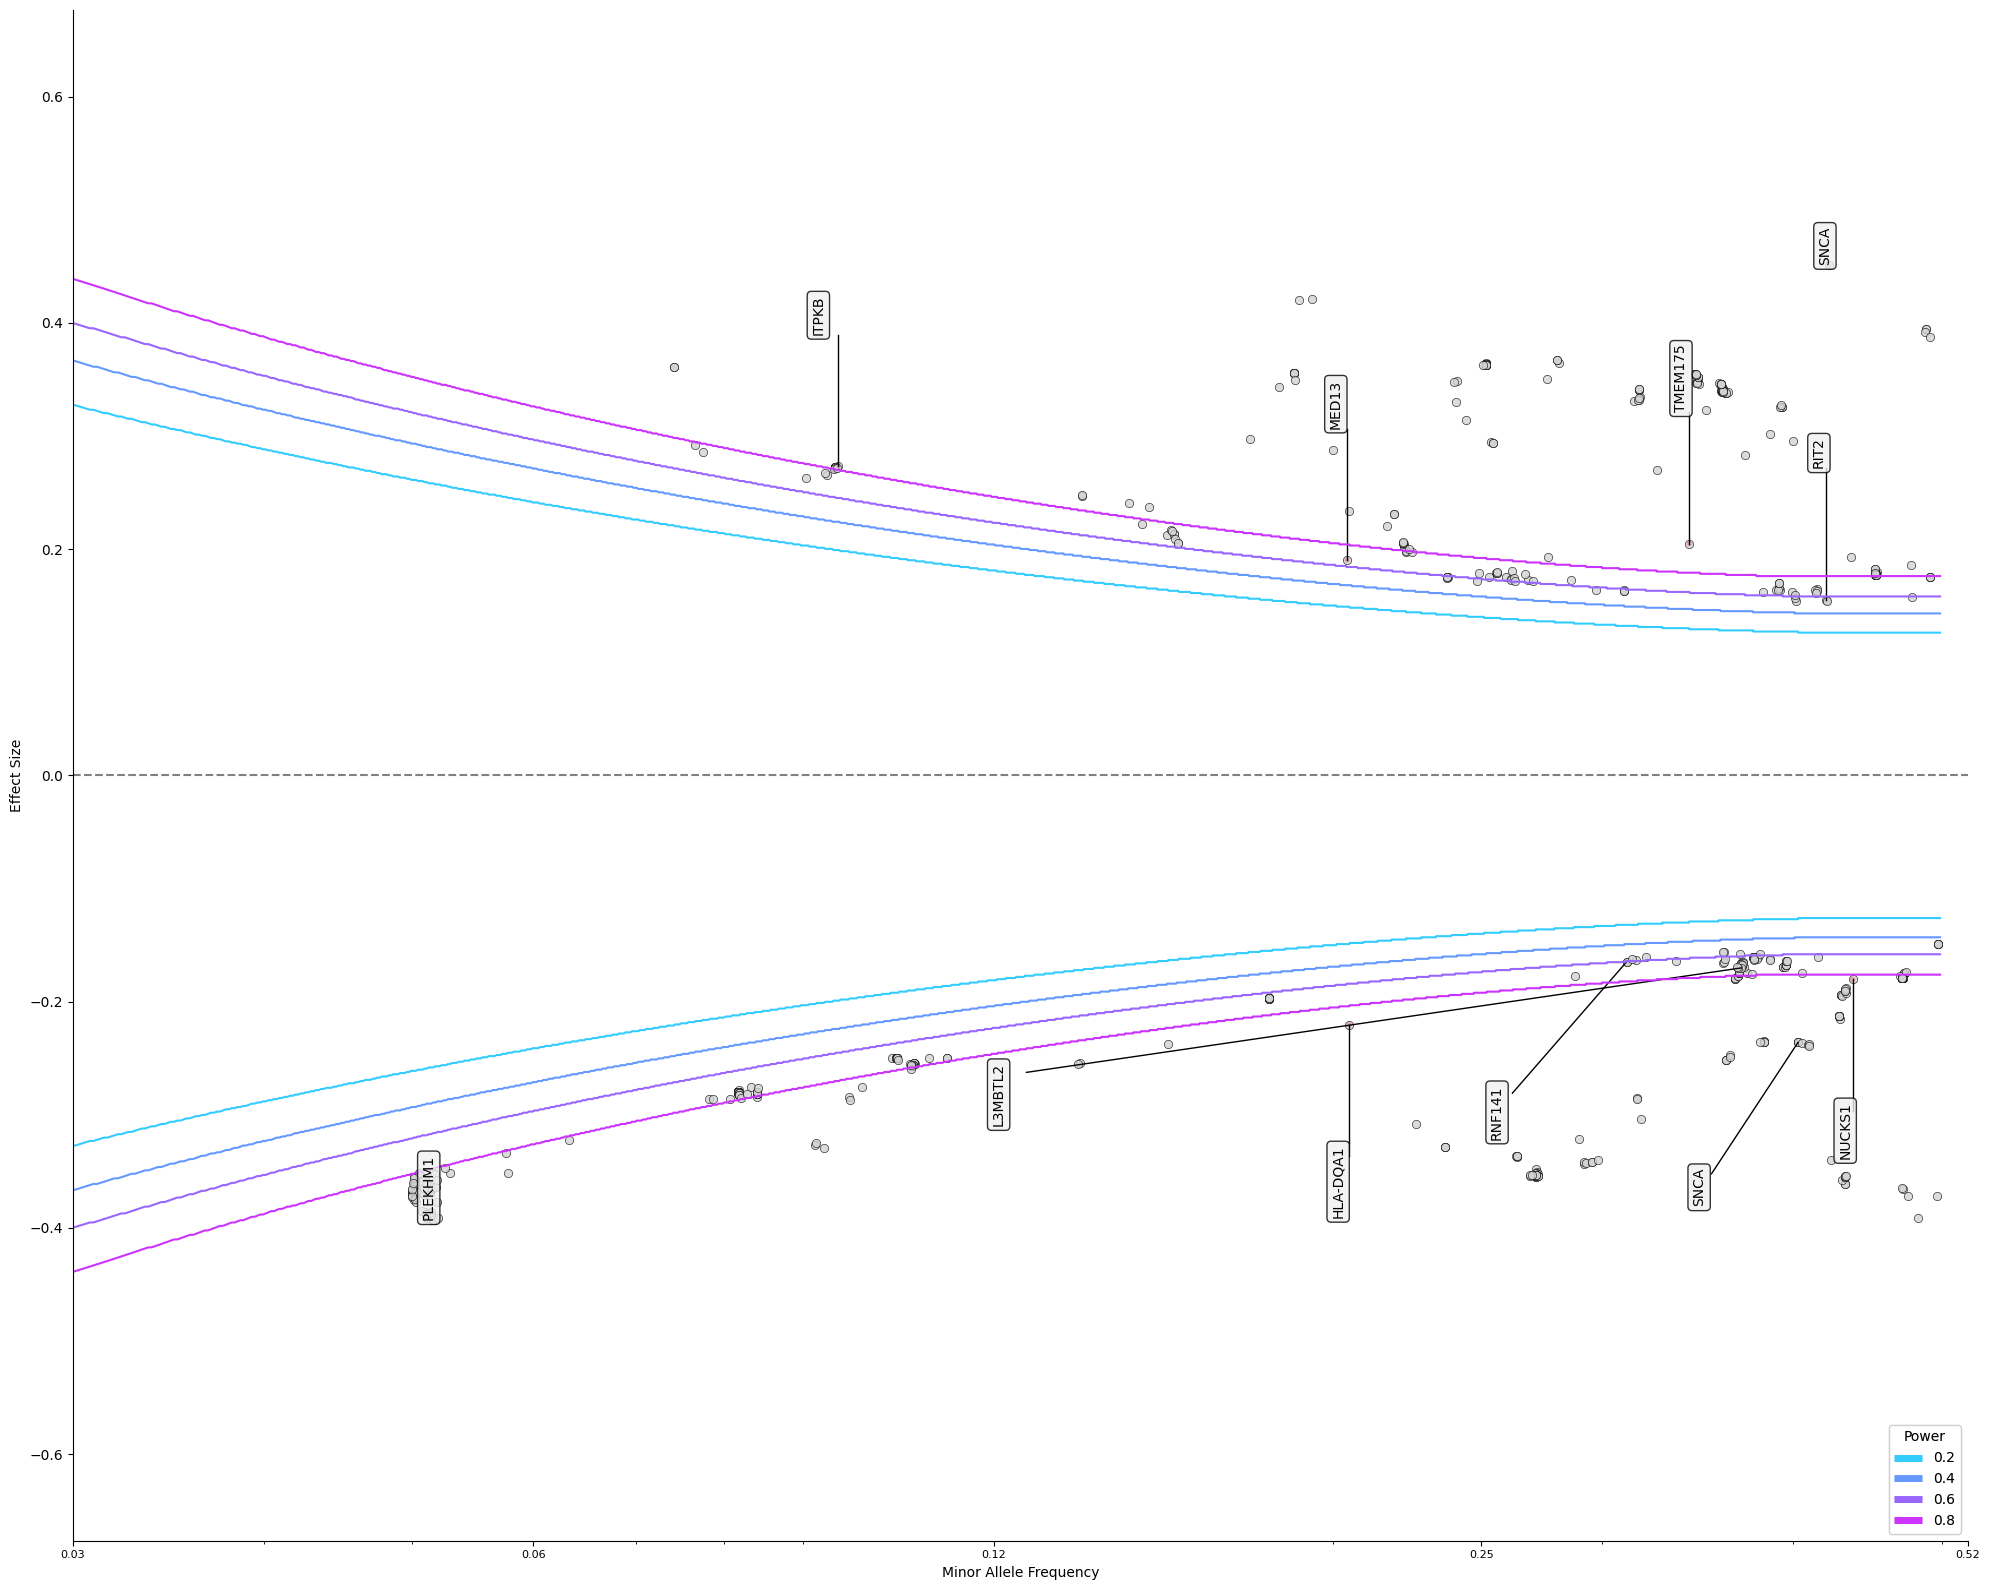

In [6]:
gwas_f_steps = {
    #'train_model': gwas_f.fixed_model_association_analysis,
    #'top_hits'   : gwas_f.get_top_hits,
    #'annotate'   : gwas_f.annotate_top_hits,
    #'plots'      : gwas_f.plot_drawings,
    #'one_cohort' : gwas_f.one_cohort_comparison,
    'trumpet'     : gwas_f.create_trumpet_plot
}

for step in gwas_f_steps.keys():
    gwas_f_steps[step]()

In [7]:
#gwas_r = GWASrandom(
#    input_path = paths['input_directory'],
#    input_name = paths['input_prefix'],
#    output_path= paths['output_directory'],
#    output_name= paths['output_prefix'],
#    config_dict= params,
#    preps_path = os.path.join(paths['output_directory'], 'preparatory'),
#)

In [8]:
#gwas_r_steps = {
#    'preparatory': gwas_r.prepare_aux_files,
#    'grm'        : gwas_r.compute_grm,
#    'random'     : gwas_r.run_gwas_random,
#    'top_hits'   : gwas_r.get_top_hits,
#    'annotate'   : gwas_r.annotate_top_hits,
#    'plots'      : gwas_r.plot_drawings
#}
#for step in gwas_r_steps.keys():
#    gwas_r_steps[step]()

In [52]:
import gwaslab as gl

mysumstats = gl.Sumstats(
    "/home/luis/data/LuxGiantimputed/outputData/gwas_fixed/ds_results_glm.PHENO1.glm.logistic.hybrid",
    fmt  ="plink2_firth",
    rsid="SNP",
    chrom="CHR",
    pos  ="POS",
    ea="A1",
    nea="A2",
    eaf="freq",
    beta="b",
    se="se",
    p="p",  
    n="N",
    sep="\t",
    z="Z_STAT",
    build="hg38")

2024/10/14 12:51:40 GWASLab v3.4.48 https://cloufield.github.io/gwaslab/
2024/10/14 12:51:40 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
2024/10/14 12:51:40 Start to load format from formatbook....
2024/10/14 12:51:40  -plink2_firth format meta info:
2024/10/14 12:51:40   - format_name  : PLINK2 .glm.firth, .glm.logistic[.hybrid]
2024/10/14 12:51:40   - format_source  : https://www.cog-genomics.org/plink/2.0/formats
2024/10/14 12:51:40   - format_version  : Alpha 3.3 final (3 Jun)
2024/10/14 12:51:40   - last_check_date  :  20220806
2024/10/14 12:51:40  -plink2_firth to gwaslab format dictionary:
2024/10/14 12:51:40   - plink2_firth keys: ID,#CHROM,POS,REF,ALT,A1,OBS_CT,A1_FREQ,BETA,LOG(OR)_SE,SE,Z_STAT,P,LOG10_P,MACH_R2,OR,L95,U95
2024/10/14 12:51:40   - gwaslab values: SNPID,CHR,POS,REF,ALT,EA,N,EAF,BETA,SE,SE,Z,P,MLOG10P,INFO,OR,OR_95L,OR_95U
2024/10/14 12:51:40 Start to initialize gl.Sumstats from file :/home/luis/data/LuxGiantimputed/outputData/gwas_fixed

In [53]:
mysumstats.data['SNPID'] = mysumstats.data['CHR'].astype(str) + ':' + mysumstats.data['POS'].astype(str) + ':' + mysumstats.data['EA'].astype(str) + ':' + mysumstats.data['NEA'].astype(str)
mysumstats.data['CHR'] = mysumstats.data['CHR'].astype(str)

,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR_95L,OR_95U,N,STATUS,ALT,SNPID
0,rs61769339,1,727242,A,G,0.181916,0.031144,0.035231,0.883995,0.376699,-0.037907,0.100195,11170,3899999,A,1:727242:A:G
1,rs61769340,1,727717,G,C,0.235228,0.016814,0.032058,0.524490,0.599938,-0.046018,0.079646,11170,3899999,G,1:727717:G:C
2,rs61769351,1,758443,C,G,0.185900,0.020681,0.034927,0.592114,0.553774,-0.047775,0.089137,11170,3899999,C,1:758443:C:G
3,rs142559957,1,769257,A,G,0.055013,-0.081504,0.060305,-1.351530,0.176527,-0.199701,0.036692,11170,3899999,A,1:769257:A:G
4,rs58276399,1,796338,C,T,0.208460,-0.005769,0.033427,-0.172597,0.862968,-0.071286,0.059747,11170,3899999,C,1:796338:C:T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931176,rs7289043,22,50789831,G,A,0.057565,-0.016376,0.058171,-0.281519,0.778312,-0.130389,0.097636,11170,3899999,G,22:50789831:G:A
5931177,rs201882178,22,50790460,G,T,0.251567,0.021227,0.031231,0.679681,0.496707,-0.039984,0.082438,11170,3899999,G,22:50790460:G:T
5931178,rs80012748,22,50790482,A,G,0.201835,0.041492,0.033957,1.221880,0.221753,-0.025063,0.108046,11170,3899999,A,22:50790482:A:G
5931179,rs9616985,22,50791377,C,T,0.057565,-0.016376,0.058171,-0.281519,0.778312,-0.130389,0.097636,11170,3899999,C,22:50791377:C:T


In [87]:
import pandas as pd
highlighted = pd.read_csv('/home/luis/data/LuxGiantimputed/outputData/gwas_fixed/snps_annotated.csv', sep='\t')
highlighted = pd.merge(highlighted, mysumstats.data[['rsID', 'SNPID', 'CHR', 'POS']], left_on='SNP', right_on='rsID', how='inner')
highlighted


,SNP,GENE,rsID,SNPID,CHR,POS
0,rs3747973,NUCKS1,rs3747973,1:205708020:A:G,1,205708020
1,rs74990530,ITPKB,rs74990530,1:226728477:T:A,1,226728477
2,rs34311866,TMEM175,rs34311866,4:958159:C:T,4,958159
3,rs356182,SNCA,rs356182,4:89704960:G:A,4,89704960
4,rs7681440,SNCA,rs7681440,4:89835399:C:G,4,89835399
5,rs1846190,HLA-DQA1,rs1846190,6:32616036:A:G,6,32616036
6,rs4909940,RNF141,rs4909940,11:10521749:T:C,11,10521749
7,rs56328224,PLEKHM1,rs56328224,17:45495053:T:C,17,45495053
8,rs72843781,MED13,rs72843781,17:62016181:C:A,17,62016181
9,rs8087199,RIT2,rs8087199,18:43094076:A:G,18,43094076


2024/10/14 13:25:43 Start to create trumpet plot...
2024/10/14 13:25:43  -Settings:
2024/10/14 13:25:43   -Mode: b
2024/10/14 13:25:43   -N_CASE: 48060
2024/10/14 13:25:43   -N_CONTROL: 6364
2024/10/14 13:25:43   -PREVALENCE: 0.05
2024/10/14 13:25:43   -BETA: BETA
2024/10/14 13:25:43   -Significance level: 5e-08
2024/10/14 13:25:43   -Power thresholds: [0.2, 0.4, 0.6, 0.8]
2024/10/14 13:25:43   -Power line smoothness: 2000
2024/10/14 13:25:43  -Excluding variants with P values > 5e-08
2024/10/14 13:25:43  -Plotting 880 variants...
2024/10/14 13:25:43  -Flipping 0 variants...
2024/10/14 13:25:43  -Updating eaf-beta matrix...
2024/10/14 13:25:43  -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....
2024/10/14 13:25:44  -Extracting eaf-beta combinations with power = 0.2...
2024/10/14 13:25:44  -Updating eaf-beta matrix...
2024/10/14 13:25:44  -GRR is approximated using OR. For prevalence < 10%, GRR is very similar to OR....
2024/10/14 13:25:44  -Extracting ea

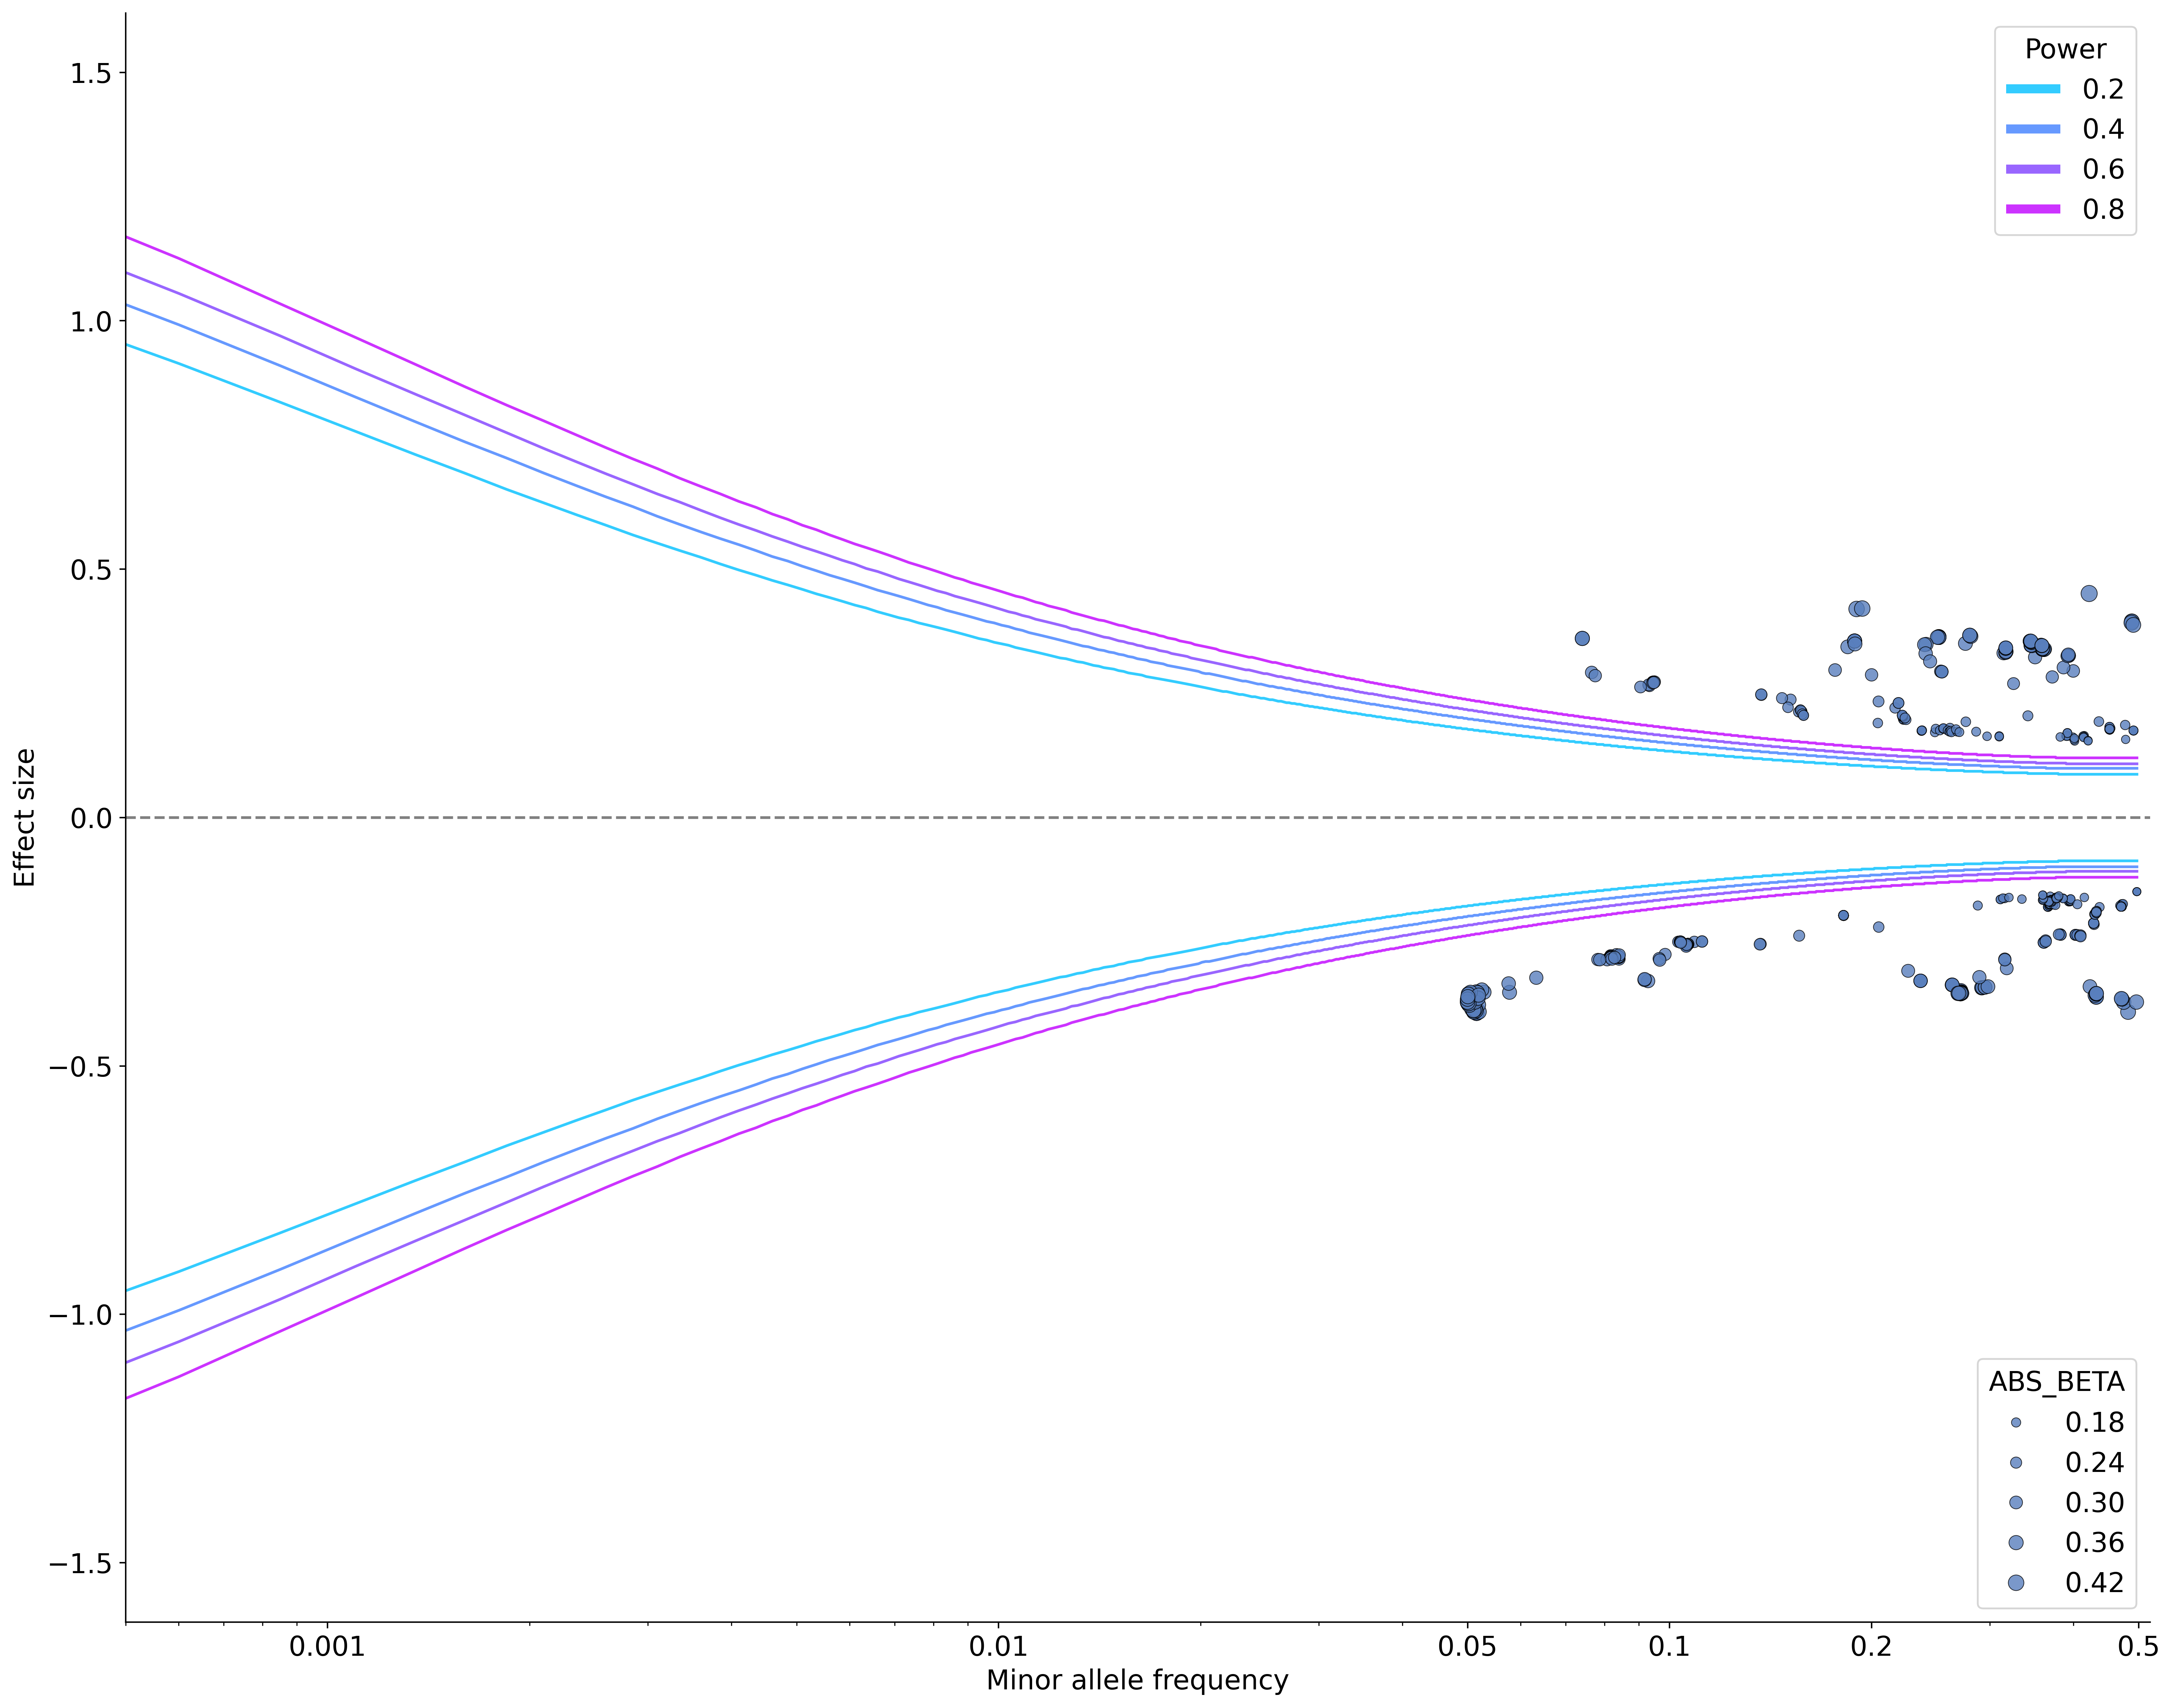

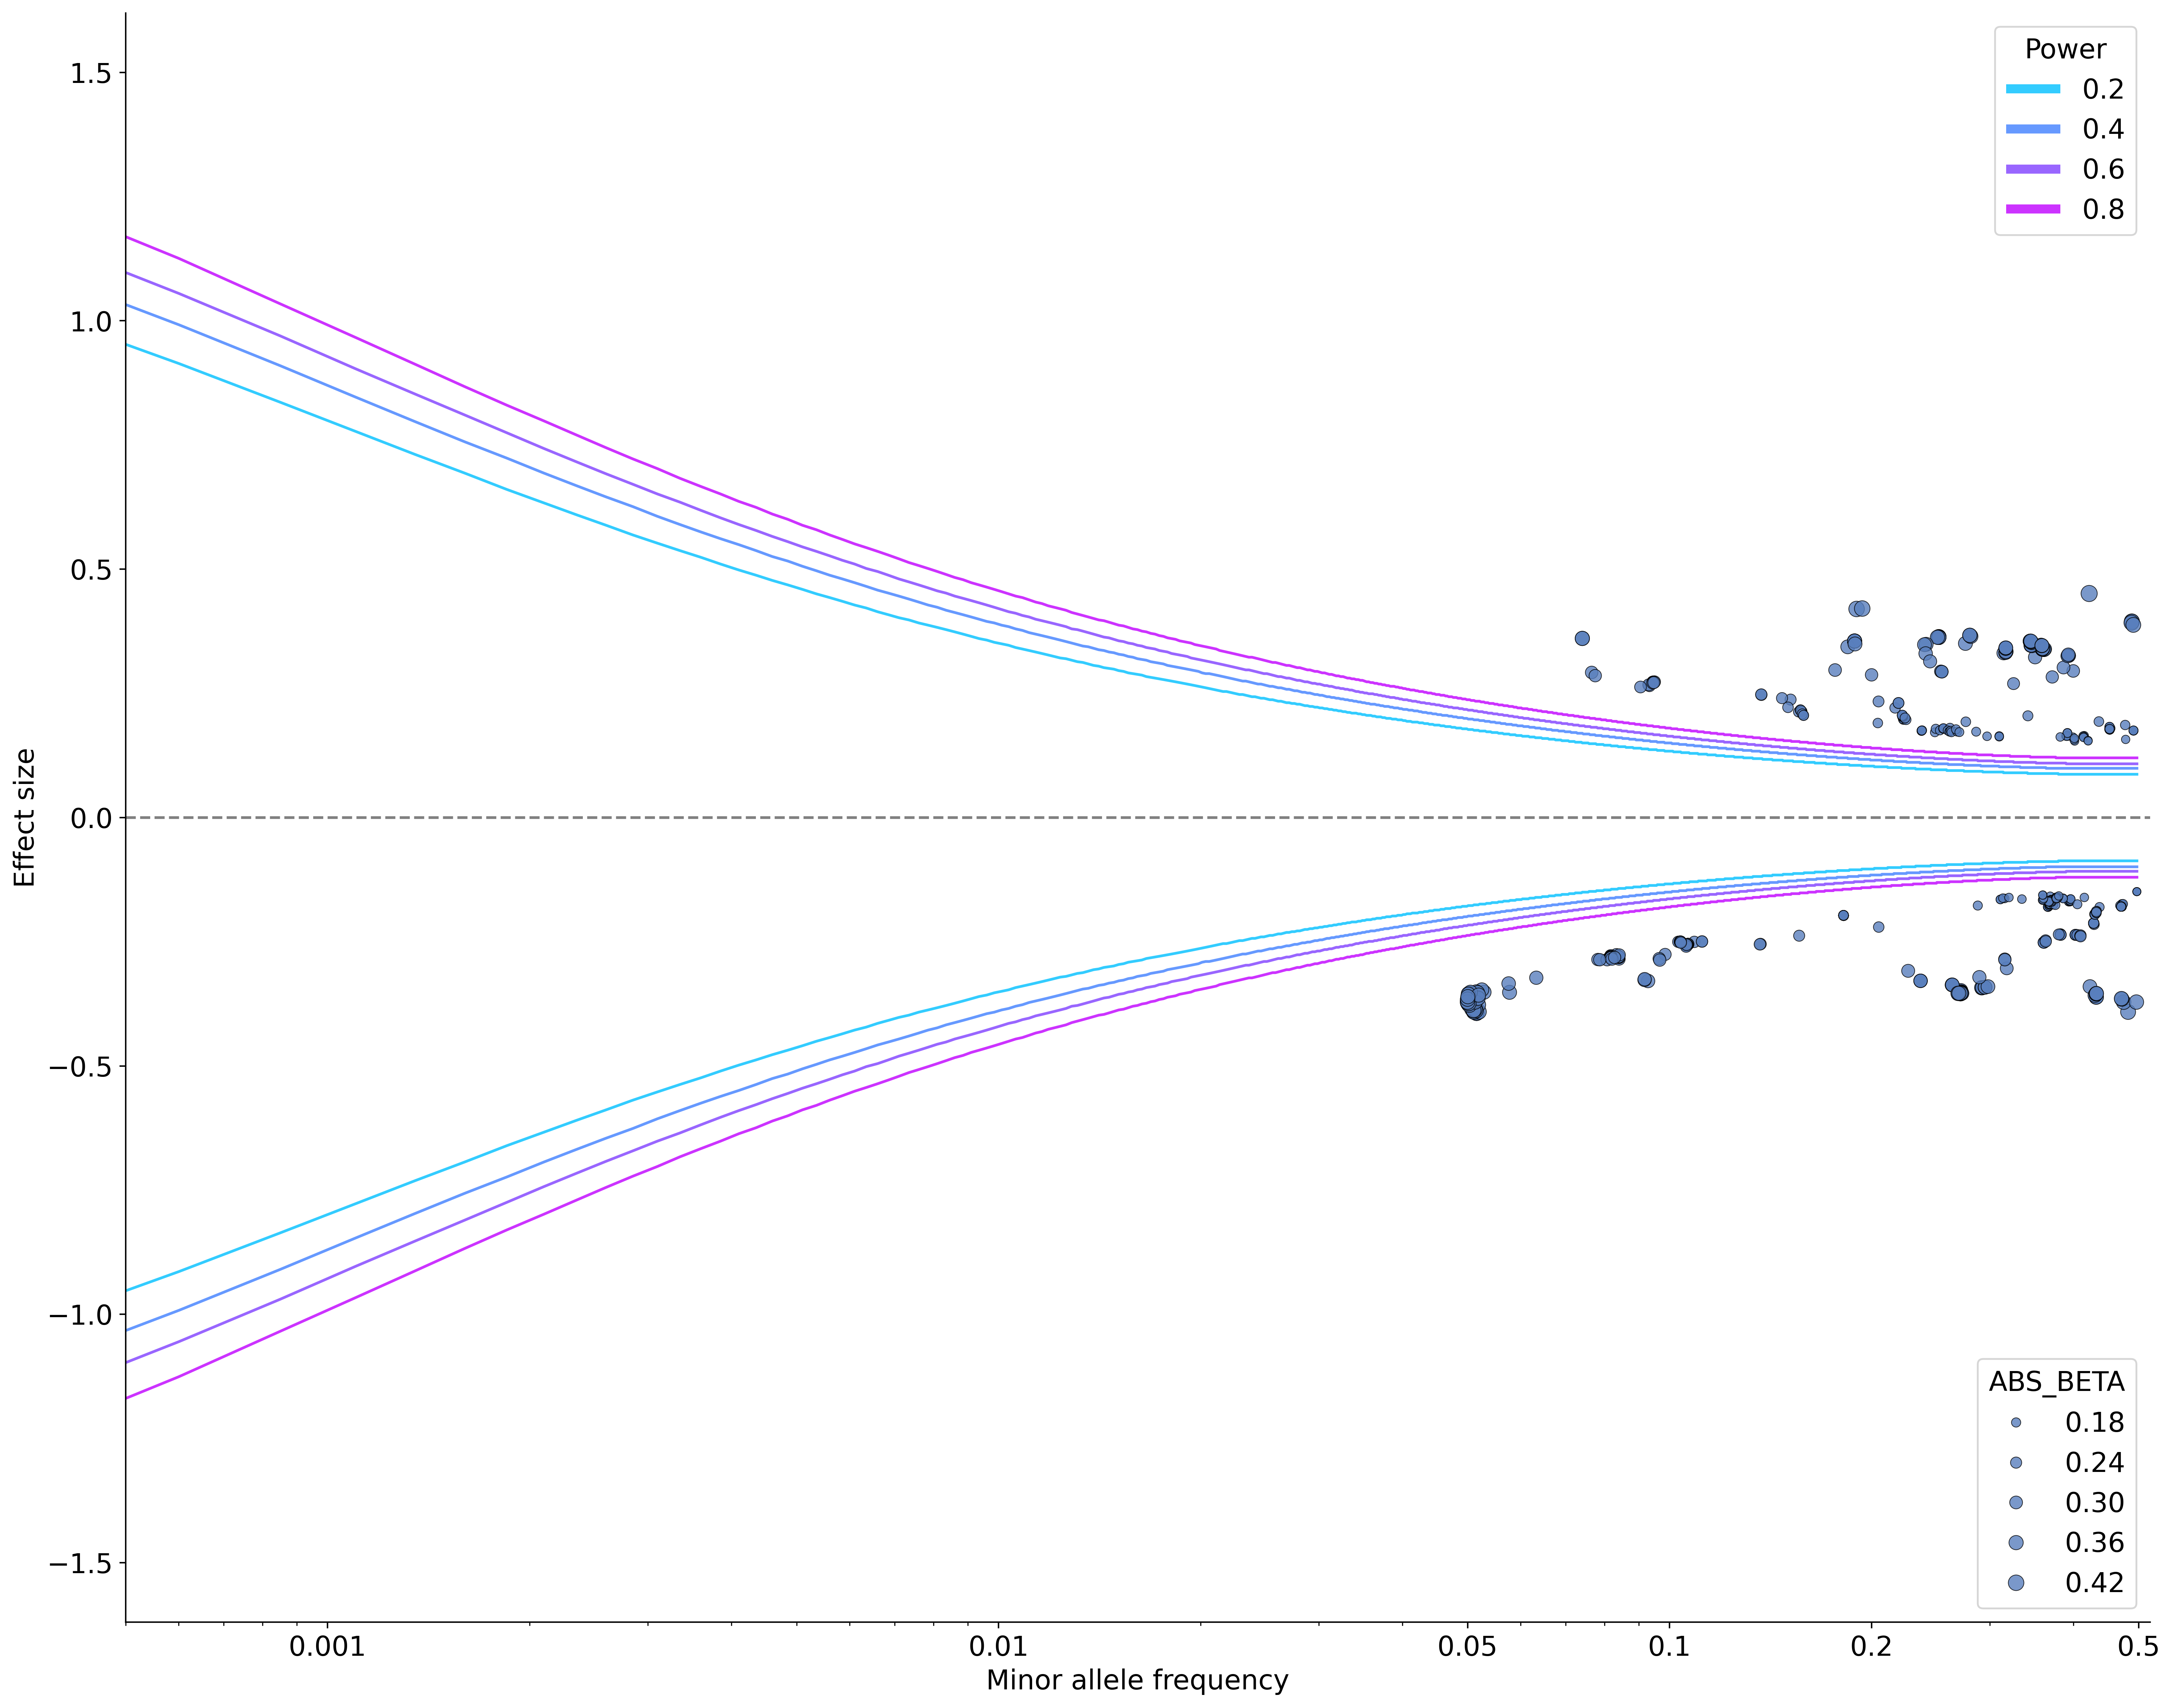

In [89]:
mysumstats.plot_trumpet(
    mode="b", 
    n_matrix=2000, 
    ncase=48060, 
    ncontrol=6364, 
    prevalence=0.05,
    figargs={"figsize": (20, 16), "dpi": 400},
    font_family='DejaVu Sans',
    highlight=highlighted['SNPID'].tolist(),
    #anno_x=None,
    #anno_y=None,
    highlight_windowkb = 0.01,
    anno="GENENAME"
)

In [56]:
highlighted1 = pd.merge(highlighted, mysumstats.data[['rsID', 'SNPID', 'CHR', 'POS']], left_on='SNP', right_on='rsID', how='inner')
highlighted1


,SNP,GENE,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR_95L,OR_95U,N,STATUS,ALT,SNPID
0,rs3747973,NUCKS1,rs3747973,1,205708020,A,G,0.437287,-0.180252,0.027646,-6.52002,7.029820e-11,-0.234437,-0.126067,11170,3899999,A,1:205708020:A:G
1,rs74990530,ITPKB,rs74990530,1,226728477,T,A,0.094942,0.273158,0.046359,5.89223,3.810230e-09,0.182296,0.364019,11170,3899999,T,1:226728477:T:A
2,rs34311866,TMEM175,rs34311866,4,958159,C,T,0.341987,0.204801,0.028519,7.18120,6.910290e-13,0.148905,0.260697,11170,3899999,C,4:958159:C:T
3,rs356182,SNCA,rs356182,4,89704960,G,A,0.421979,0.451027,0.027775,16.23850,2.693180e-59,0.396589,0.505465,11170,3899999,G,4:89704960:G:A
4,rs7681440,SNCA,rs7681440,4,89835399,C,G,0.402820,-0.236062,0.027914,-8.45688,2.746340e-17,-0.290772,-0.181353,11170,3899999,C,4:89835399:C:G
5,rs1846190,HLA-DQA1,rs1846190,6,32616036,A,G,0.204969,-0.220423,0.033930,-6.49635,8.229450e-11,-0.286925,-0.153921,11170,3899999,A,6:32616036:A:G
6,rs4909940,RNF141,rs4909940,11,10521749,T,C,0.311191,-0.164835,0.029750,-5.54061,3.014140e-08,-0.223145,-0.106526,11170,3899999,T,11:10521749:T:C
7,rs56328224,PLEKHM1,rs56328224,17,45495053,T,C,0.051567,-0.393346,0.064096,-6.13682,8.418710e-10,-0.518971,-0.267720,11170,3899999,T,17:45495053:T:C
8,rs72843781,MED13,rs72843781,17,62016181,C,A,0.204342,0.190305,0.034023,5.59340,2.226630e-08,0.123621,0.256989,11170,3899999,C,17:62016181:C:A
9,rs8087199,RIT2,rs8087199,18,43094076,A,G,0.420412,0.155191,0.027788,5.58492,2.338040e-08,0.100729,0.209654,11170,3899999,A,18:43094076:A:G


In [86]:
from gwaslab.viz_plot_mqqplot import _process_highlight

mystats = mysumstats.data[mysumstats.data['P'] < 5e-8].reset_index(drop=True)
mystats['CHR'] = mystats['CHR'].astype(int)

test =_process_highlight(
    sumstats=mystats, 
    highlight=highlighted1['SNPID'].tolist(), 
    highlight_chrpos=True, 
    highlight_windowkb=0.01, 
    snpid="SNPID", 
    chrom='CHR', 
    pos='POS',
)
test['HUE'].value_counts()

HUE
0.0    11
Name: count, dtype: int64

In [75]:
mystats[mystats['SNPID'].isin(highlighted1['SNPID'].to_list())]
mystats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   rsID    880 non-null    object  
 1   CHR     880 non-null    string  
 2   POS     880 non-null    int64   
 3   EA      880 non-null    category
 4   NEA     880 non-null    category
 5   EAF     880 non-null    float64 
 6   BETA    880 non-null    float64 
 7   SE      880 non-null    float64 
 8   Z       880 non-null    float64 
 9   P       880 non-null    float64 
 10  OR_95L  880 non-null    float64 
 11  OR_95U  880 non-null    float64 
 12  N       880 non-null    int64   
 13  STATUS  880 non-null    category
 14  ALT     880 non-null    object  
 15  SNPID   880 non-null    object  
 16  HUE     0 non-null      float64 
dtypes: category(3), float64(8), int64(2), object(3), string(1)
memory usage: 20.0+ MB


In [65]:
test[test['SNPID'].isin(highlighted1['SNPID'].to_list())]

,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR_95L,OR_95U,N,STATUS,ALT,SNPID,HUE
1,rs3747973,1,205708020,A,G,0.437287,-0.180252,0.027646,-6.52002,7.029820e-11,-0.234437,-0.126067,11170,3899999,A,1:205708020:A:G,NaN
95,rs74990530,1,226728477,T,A,0.094942,0.273158,0.046359,5.89223,3.810230e-09,0.182296,0.364019,11170,3899999,T,1:226728477:T:A,NaN
113,rs34311866,4,958159,C,T,0.341987,0.204801,0.028519,7.18120,6.910290e-13,0.148905,0.260697,11170,3899999,C,4:958159:C:T,NaN
162,rs356182,4,89704960,G,A,0.421979,0.451027,0.027775,16.23850,2.693180e-59,0.396589,0.505465,11170,3899999,G,4:89704960:G:A,NaN
341,rs7681440,4,89835399,C,G,0.402820,-0.236062,0.027914,-8.45688,2.746340e-17,-0.290772,-0.181353,11170,3899999,C,4:89835399:C:G,NaN
465,rs1846190,6,32616036,A,G,0.204969,-0.220423,0.033930,-6.49635,8.229450e-11,-0.286925,-0.153921,11170,3899999,A,6:32616036:A:G,NaN
546,rs4909940,11,10521749,T,C,0.311191,-0.164835,0.029750,-5.54061,3.014140e-08,-0.223145,-0.106526,11170,3899999,T,11:10521749:T:C,NaN
550,rs56328224,17,45495053,T,C,0.051567,-0.393346,0.064096,-6.13682,8.418710e-10,-0.518971,-0.267720,11170,3899999,T,17:45495053:T:C,NaN
841,rs72843781,17,62016181,C,A,0.204342,0.190305,0.034023,5.59340,2.226630e-08,0.123621,0.256989,11170,3899999,C,17:62016181:C:A,NaN
844,rs8087199,18,43094076,A,G,0.420412,0.155191,0.027788,5.58492,2.338040e-08,0.100729,0.209654,11170,3899999,A,18:43094076:A:G,NaN


In [73]:
def process_highlight(sumstats, highlight, highlight_chrpos, highlight_windowkb, snpid, chrom, pos):
        if pd.api.types.is_list_like(highlight[0]):
            if highlight_chrpos == False:
                # highlight for multiple sets
                for i, highlight_set in enumerate(highlight):
                    to_highlight = sumstats.loc[sumstats[snpid].isin(highlight_set),:]
                    #assign colors: 0 is hightlight color
                    for index,row in to_highlight.iterrows():
                        target_chr = int(row[chrom])
                        target_pos = int(row[pos])
                        right_chr=sumstats[chrom]==target_chr
                        up_pos=sumstats[pos]>target_pos-highlight_windowkb*1000
                        low_pos=sumstats[pos]<target_pos+highlight_windowkb*1000
                        sumstats.loc[right_chr&up_pos&low_pos,"HUE"]=i
            else:
                for i, highlight_chrpos_tuple in enumerate(highlight):
                    # len 2 : chr, center
                    # len 3 : chr, start, end
                    if len(highlight_chrpos_tuple) ==2:
                        target_chr = int(highlight_chrpos_tuple[0])
                        target_pos = int(highlight_chrpos_tuple[1])
                        right_chr=sumstats[chrom]==target_chr
                        up_pos=sumstats[pos]>target_pos-highlight_windowkb*1000
                        low_pos=sumstats[pos]<target_pos+highlight_windowkb*1000
                        sumstats.loc[right_chr&up_pos&low_pos,"HUE"]=0
                    elif len(highlight_chrpos_tuple) ==3:
                        target_chr = int(highlight_chrpos_tuple[0])
                        target_pos_low = int(highlight_chrpos_tuple[1])
                        target_pos_up = int(highlight_chrpos_tuple[2])
                        right_chr=sumstats[chrom]==target_chr
                        up_pos=sumstats[pos] > target_pos_low
                        low_pos=sumstats[pos] < target_pos_up
                        sumstats.loc[right_chr&up_pos&low_pos,"HUE"]=0                        
        else:
            # highlight for one set
            to_highlight = sumstats.loc[sumstats[snpid].isin(highlight),:]
            #assign colors: 0 is hightlight color
            for index,row in to_highlight.iterrows():
                target_chr = int(row[chrom])
                print('chrom',target_chr)
                target_pos = int(row[pos])
                print('pos',target_pos)
                right_chr=sumstats[chrom]==target_chr
                print('right_chr',right_chr.sum())
                up_pos=sumstats[pos]>target_pos-highlight_windowkb*1000
                low_pos=sumstats[pos]<target_pos+highlight_windowkb*1000
                print('right_chr',right_chr.sum())
                sumstats.loc[right_chr&up_pos&low_pos,"HUE"]=0
        return sumstats

In [74]:
test1 =process_highlight(
    sumstats=test.drop(columns='HUE'), 
    highlight=highlighted1['SNPID'].tolist(), 
    highlight_chrpos=True, 
    highlight_windowkb=1000, 
    snpid="SNPID", 
    chrom='CHR', 
    pos='POS',
)
test1[test1['SNPID'].isin(highlighted1['SNPID'].to_list())]

chrom 1
pos 205708020
right_chr 0
right_chr 0
chrom 1
pos 226728477
right_chr 0
right_chr 0
chrom 4
pos 958159
right_chr 0
right_chr 0
chrom 4
pos 89704960
right_chr 0
right_chr 0
chrom 4
pos 89835399
right_chr 0
right_chr 0
chrom 6
pos 32616036
right_chr 0
right_chr 0
chrom 11
pos 10521749
right_chr 0
right_chr 0
chrom 17
pos 45495053
right_chr 0
right_chr 0
chrom 17
pos 62016181
right_chr 0
right_chr 0
chrom 18
pos 43094076
right_chr 0
right_chr 0
chrom 22
pos 41196673
right_chr 0
right_chr 0


,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR_95L,OR_95U,N,STATUS,ALT,SNPID,HUE
1,rs3747973,1,205708020,A,G,0.437287,-0.180252,0.027646,-6.52002,7.029820e-11,-0.234437,-0.126067,11170,3899999,A,1:205708020:A:G,NaN
95,rs74990530,1,226728477,T,A,0.094942,0.273158,0.046359,5.89223,3.810230e-09,0.182296,0.364019,11170,3899999,T,1:226728477:T:A,NaN
113,rs34311866,4,958159,C,T,0.341987,0.204801,0.028519,7.18120,6.910290e-13,0.148905,0.260697,11170,3899999,C,4:958159:C:T,NaN
162,rs356182,4,89704960,G,A,0.421979,0.451027,0.027775,16.23850,2.693180e-59,0.396589,0.505465,11170,3899999,G,4:89704960:G:A,NaN
341,rs7681440,4,89835399,C,G,0.402820,-0.236062,0.027914,-8.45688,2.746340e-17,-0.290772,-0.181353,11170,3899999,C,4:89835399:C:G,NaN
465,rs1846190,6,32616036,A,G,0.204969,-0.220423,0.033930,-6.49635,8.229450e-11,-0.286925,-0.153921,11170,3899999,A,6:32616036:A:G,NaN
546,rs4909940,11,10521749,T,C,0.311191,-0.164835,0.029750,-5.54061,3.014140e-08,-0.223145,-0.106526,11170,3899999,T,11:10521749:T:C,NaN
550,rs56328224,17,45495053,T,C,0.051567,-0.393346,0.064096,-6.13682,8.418710e-10,-0.518971,-0.267720,11170,3899999,T,17:45495053:T:C,NaN
841,rs72843781,17,62016181,C,A,0.204342,0.190305,0.034023,5.59340,2.226630e-08,0.123621,0.256989,11170,3899999,C,17:62016181:C:A,NaN
844,rs8087199,18,43094076,A,G,0.420412,0.155191,0.027788,5.58492,2.338040e-08,0.100729,0.209654,11170,3899999,A,18:43094076:A:G,NaN
